<a name="top"></a>
## Contents

* [Setup](#Setup)
* [References](#References)
* [DTLZ1](#DTLZ1)
* [DTLZ2](#DTLZ2)
* [DTLZ3](#DTLZ3)
* [DTLZ4](#DTLZ4)
* [DTLZ5](#DTLZ5)
* [DTLZ6](#DTLZ6)
* [DTLZ7](#DTLZ7)

<a id="top"></a>

## Setup

In this notebook, we will run the MOCMA optimizer for functions in the DTLZ benchmark.
For these functions, an analytical form of the optimal Pareto front [is known](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/).

For each function, we will run 4 different configurations of the MOCMA optimizer for 5 trials. At each trial the optimizer will stop until a maximum number of iterations is reached or if the target volume (based on the [known maximum hypervolume](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/) for various population sizes) is surpassed.

In [1]:
import dataclasses

import math
import numpy as np

from anguilla.fitness import benchmark

from experiment import TrialParameters, run_trials, population_plot_2d, runtime_summary, volume_summary

In [2]:
# 1) Configurable global settings

# Number of trials
N_TRIALS = 5

# Number of dimensions
N_DIMENSIONS = 30

# Number of parents
N_PARENTS = 20

# For reproducible results we set a base seed to create the seed 
# sequence used to generate children seeds for each independent trial
SEED = 84574962

# Maximum number of evaluations to run the optimizer for
MAX_EVALUATIONS = 50000

# Truncate the maximum known hypervolume value to this number of decimal digits
VOLUMES_N_DIGITS = 4

# Reference point used for the known maximum hypervolume values
REFERENCE = np.array([11., 11.])

# 2) Other global values

# We store target hypervolumes for each function in the benchmark.

VOLUMES = {}
VOLUMES["dtlz1"] = {2: 120.750000, 3: 120.812500, 4: 120.833333, 5: 120.843750, 10: 120.861111,
                  20: 120.868421, 50: 120.872449, 100: 120.873737, 1000: 120.874875}
VOLUMES["dtlz2"] = {2: 120.000000, 3: 120.085786, 4: 120.121585, 5: 120.141536, 10: 120.178966,
                   20: 120.196858, 50: 120.207485, 100: 120.210644, 1000: 120.214114}
VOLUMES["dtlz3"] = {2: 120.000000, 3: 120.085786, 4: 120.121585, 5: 120.141536, 10: 120.178966,
                   20: 120.196858, 50: 120.207485, 100: 120.210643, 1000: 120.214114}
VOLUMES["dtlz4"] = {2: 120.000000, 3: 120.085786, 4: 120.121585, 5: 120.141536, 10: 120.178966,
                   20: 120.196858, 50: 120.207485, 100: 120.210634, 1000: 120.214114}
VOLUMES["dtlz7"] = {2: 112.534293, 3: 114.676857, 4: 115.495800, 5: 115.748424, 10: 115.964708, 
                   20: 116.045710, 50: 116.089454, 100: 116.101551, 1000: 116.111529}
# Helper functions
def truncate(value, n_digits=VOLUMES_N_DIGITS):
    tmp = 10 ** n_digits
    value = math.trunc(value * tmp)
    return value / tmp

# Store common parameters which are customized using dataclasses.replace
def get_base_params(fn_cls, key):
    target_volume = None
    reference = None
    if key in VOLUMES:
        target_volume = truncate(VOLUMES[key][N_PARENTS])
        reference = REFERENCE

    return TrialParameters(
                fn_cls,
                fn_args=(N_DIMENSIONS,),
                n_parents=N_PARENTS,
                max_evaluations=MAX_EVALUATIONS,
                #target_indicator_value=target_volume,
                #reference=reference,
            )

PARAMETERS = {}
PARAMETERS["dtlz1"] = get_base_params(benchmark.DTLZ1, "dtlz1")
PARAMETERS["dtlz2"] = get_base_params(benchmark.DTLZ2, "dtlz2")
PARAMETERS["dtlz3"] = get_base_params(benchmark.DTLZ3, "dtlz3")
PARAMETERS["dtlz4"] = get_base_params(benchmark.DTLZ4, "dtlz4")
PARAMETERS["dtlz5"] = get_base_params(benchmark.DTLZ5, "dtlz5")
PARAMETERS["dtlz6"] = get_base_params(benchmark.DTLZ5, "dtlz6")
PARAMETERS["dtlz7"] = get_base_params(benchmark.DTLZ7, "dtlz7")

def run(key, **parameter_replacements):
    params = dataclasses.replace(PARAMETERS[key], **parameter_replacements)
    results = run_trials(params, seed=SEED, n_trials=N_TRIALS)
    runtime_summary(results)
    volume_summary(results)
    return population_plot_2d(results)

## DTLZ1
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 3.29s, ask = 1.31s, tell = 1.53s, eval = 0.45s
No reference point was provided.


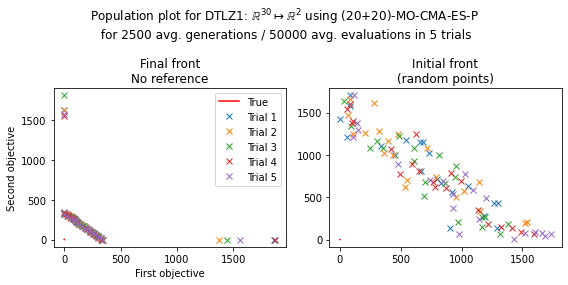

In [3]:
fig = run("dtlz1", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 3.60s, ask = 1.44s, tell = 1.66s, eval = 0.51s
No reference point was provided.


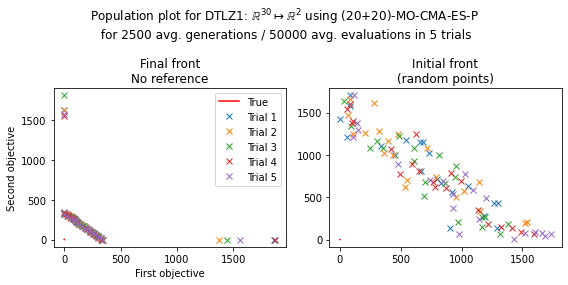

In [4]:
fig = run("dtlz1")

### Steady-state, individual-based

In [ ]:
fig = run("dtlz1", success_notion="individual", n_offspring=1)

### Steady-state, population-based

We observe that the steady-state using the population-based notion of success achieves better distribution than the other 3 variants.

In [ ]:
fig = run("dtlz1", n_offspring=1)

## DTLZ2
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 5.17s, ask = 1.52s, tell = 1.72s, eval = 1.93s
No reference point was provided.


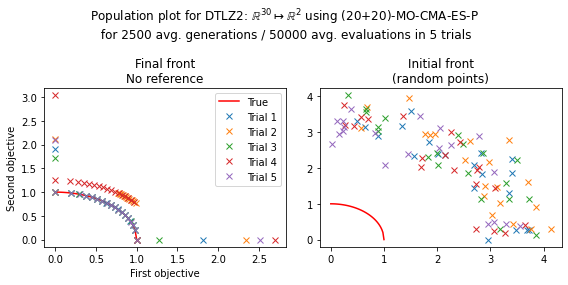

In [5]:
fig = run("dtlz2", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.36s, ask = 1.87s, tell = 2.11s, eval = 2.38s
No reference point was provided.


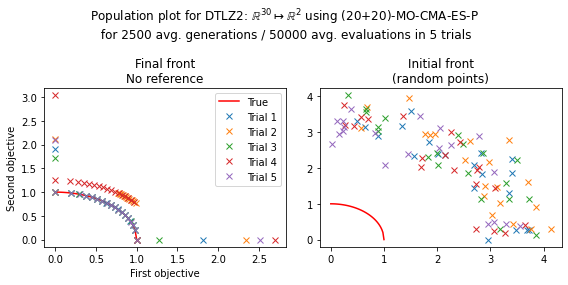

In [6]:
fig = run("dtlz2")

### Steady-state, individual-based

In [ ]:
fig = run("dtlz2", success_notion="individual", n_offspring=1)

### Steady-state, population-based

We observe that the steady-state using the population-based notion of success reaches the target volume faster than the other 3 variants and achieves better distribution.

In [ ]:
fig = run("dtlz2", n_offspring=1)

## DTLZ3
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.26s, ask = 1.69s, tell = 1.97s, eval = 2.59s
No reference point was provided.


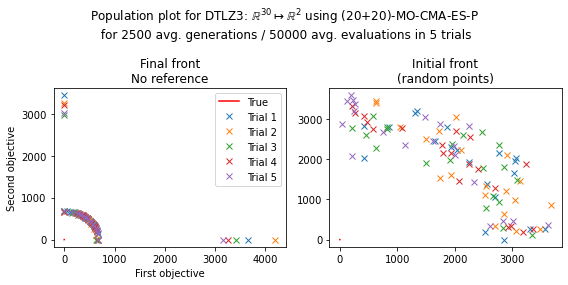

In [9]:
fig = run("dtlz3", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.44s, ask = 1.73s, tell = 2.01s, eval = 2.69s
No reference point was provided.


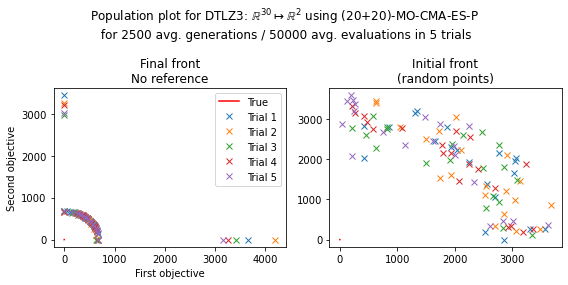

In [10]:
fig = run("dtlz3", target_indicator_value=None)

### Steady-state, individual-based

In [ ]:
fig = run("dtlz3", success_notion="individual", n_offspring=1, reference=None, target_indicator_value=None)

### Steady-state, population-based

In [ ]:
fig = run("dtlz3", n_offspring=1, reference=None, target_indicator_value=None)

## DTLZ4
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 5.98s, ask = 1.73s, tell = 1.94s, eval = 2.30s
No reference point was provided.


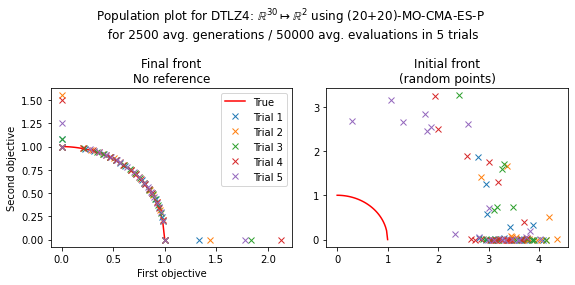

In [11]:
fig = run("dtlz4", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.13s, ask = 1.76s, tell = 1.98s, eval = 2.38s
No reference point was provided.


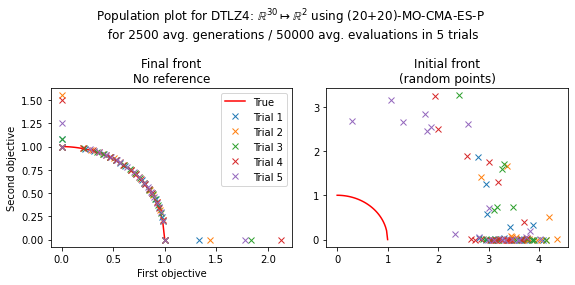

In [12]:
fig = run("dtlz4")

### Steady-state, individual-based

In [ ]:
fig = run("dtlz4", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("dtlz4", n_offspring=1)

## DTLZ5
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.90s, ask = 1.68s, tell = 1.92s, eval = 3.30s
No reference point was provided.


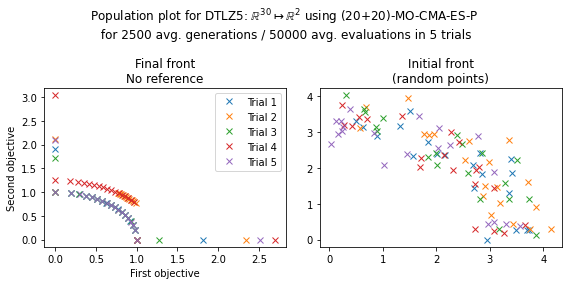

In [13]:
fig = run("dtlz5", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.64s, ask = 1.65s, tell = 1.85s, eval = 3.13s
No reference point was provided.


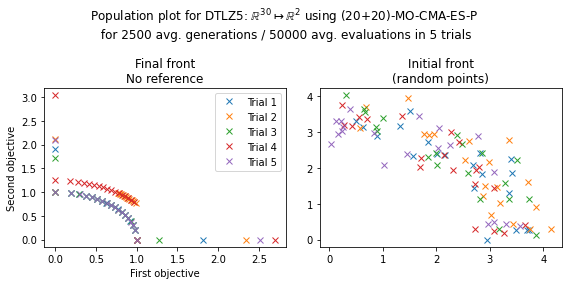

In [14]:
fig = run("dtlz5")

### Steady-state, individual-based

In [ ]:
fig = run("dtlz5", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("dtlz5", n_offspring=1)

## DTLZ6
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.64s, ask = 1.62s, tell = 1.86s, eval = 3.16s
No reference point was provided.


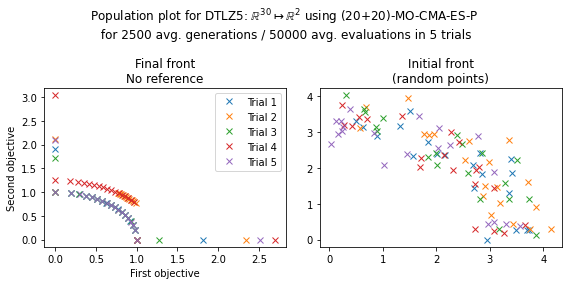

In [15]:
fig = run("dtlz6", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 7.17s, ask = 1.77s, tell = 2.02s, eval = 3.39s
No reference point was provided.


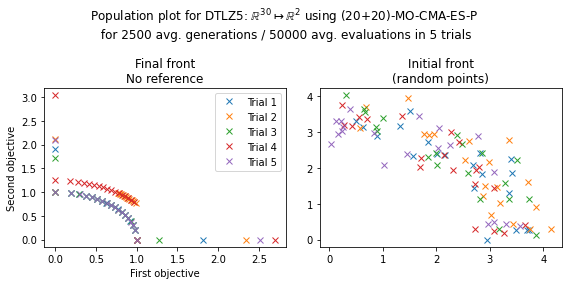

In [16]:
fig = run("dtlz6")

### Steady-state, individual-based

In [ ]:
fig = run("dtlz6", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("dtlz6", n_offspring=1)

## DTLZ7
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.61s, ask = 1.87s, tell = 2.11s, eval = 2.63s
No reference point was provided.


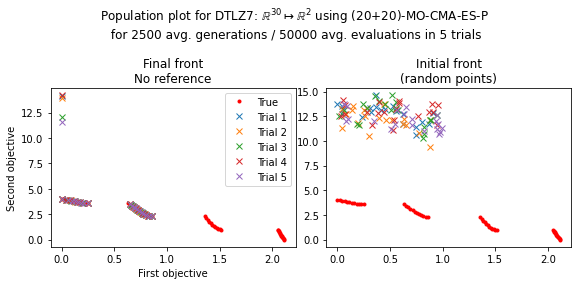

In [17]:
fig = run("dtlz7", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.60s, ask = 1.86s, tell = 2.11s, eval = 2.63s
No reference point was provided.


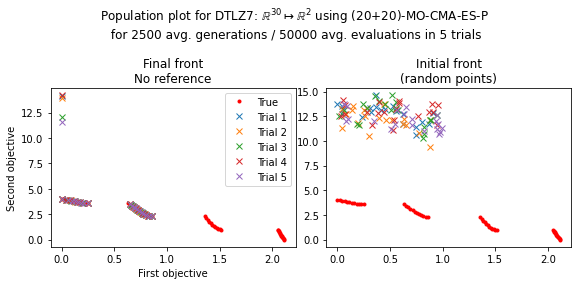

In [18]:
fig = run("dtlz7")

### Steady-state, individual-based

In [ ]:
fig = run("dtlz7", success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run("dtlz7", n_offspring=1)

## References
[Back to top](#top)

[1] Deb, K., et al. Scalable multi-objective optimization test problems. In Proceedings of the 2002 Congress on Evolutionary Computation. CEC'02 (Cat. No. 02TH8600). IEEE, 2002. p. 825-830.